# Subplots

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
plt.subplot?

<IPython.core.display.Javascript object>


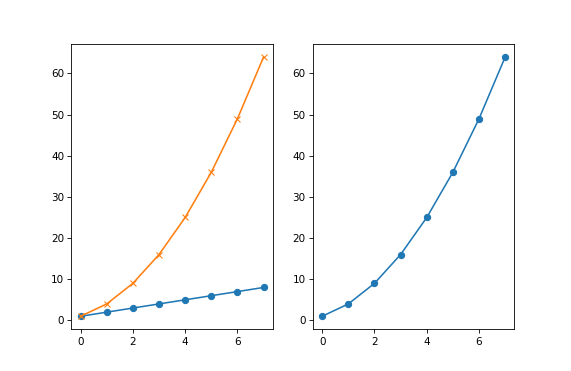

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 9)

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


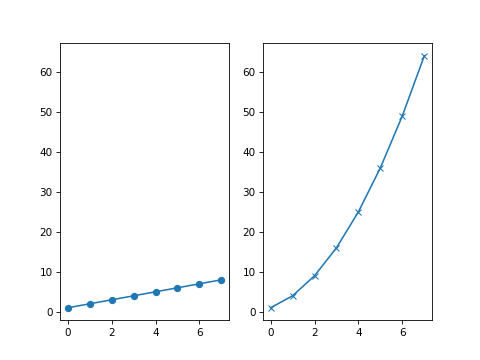

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


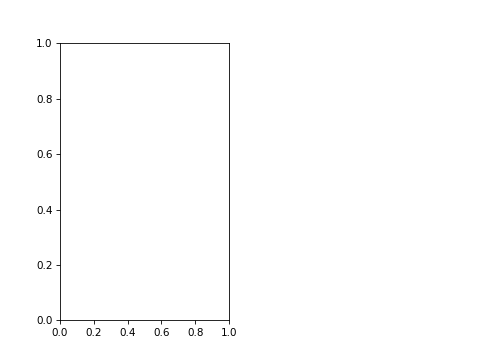

True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1, 2, 1) == plt.subplot(121)

<IPython.core.display.Javascript object>


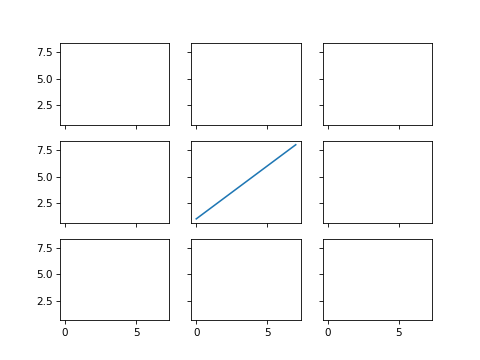

In [13]:
# create a 3x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [14]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [15]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".

In [36]:
plt.hist?

In [37]:
np.random.normal?

<IPython.core.display.Javascript object>


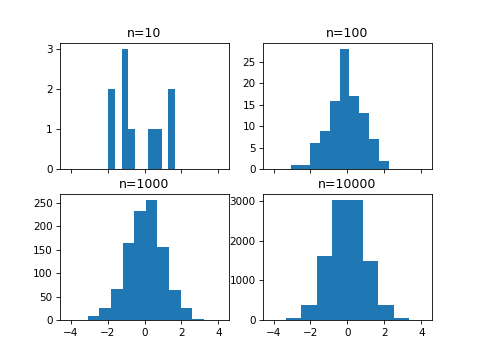

In [16]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


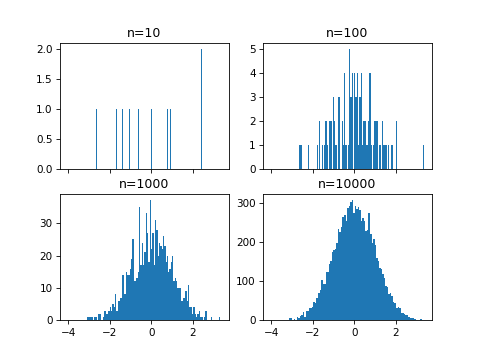

In [17]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


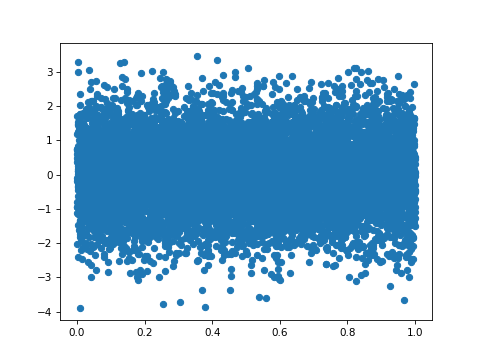

In [18]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


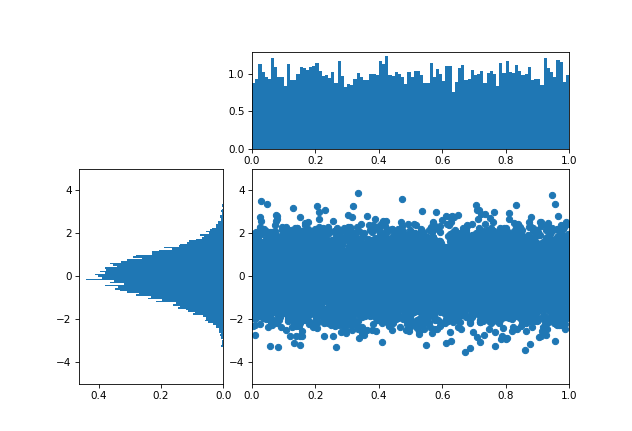

In [19]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [20]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [22]:
side_histogram.hist?

In [24]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, density=True)  # used to be 'normed=True' in older versions for normalize
                                                                          
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)  
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [25]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box and Whisker Plots

In [53]:
np.random.gamma?

In [40]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [41]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.016612,0.500211,1.985502
std,1.003139,0.290013,1.413198
min,-3.880682,0.000028,0.016680
25%,-0.683535,0.247771,0.949272
50%,-0.021313,0.499335,1.663311
75%,0.661779,0.751993,2.653276
max,3.915911,0.999960,12.730599


In [49]:
plt.boxplot?

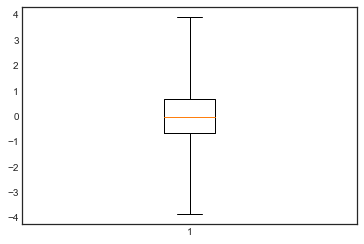

In [50]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis=(0, 100))

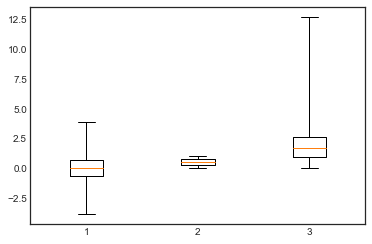

In [51]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=(0, 100))

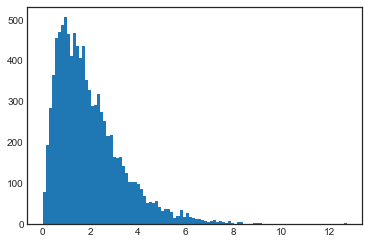

In [52]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

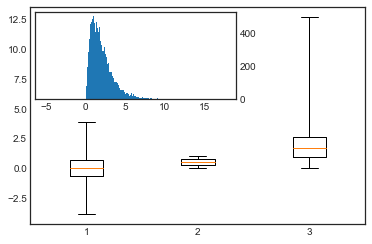

In [62]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=(0, 100))
# Overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()  # Switch the y axis ticks for ax2 to the right side.

In [60]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

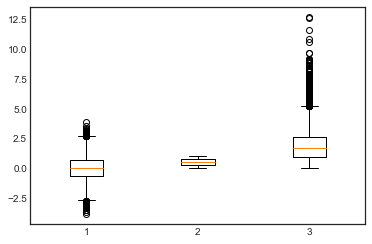

In [56]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) 
# whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

In [6]:
import seaborn as sns

<IPython.core.display.Javascript object>


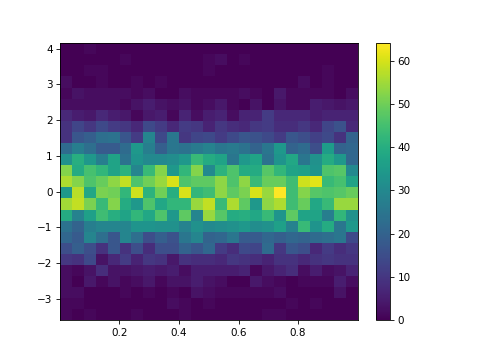

In [7]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)
plt.colorbar()  # Add a colorbar legend

<IPython.core.display.Javascript object>


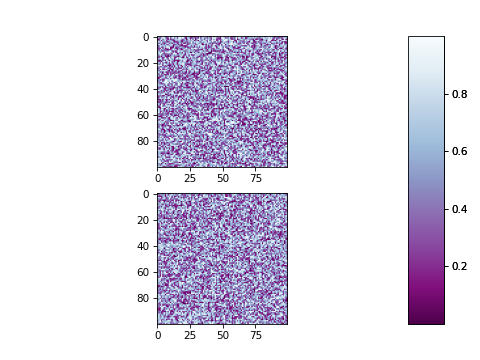

In [8]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
plt.colorbar()  # Add a colorbar legend

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

# Animations

In [3]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
x[:10]

array([-2.3716481 , -1.68267345,  0.59228096,  0.06510823,  1.42053404,
       -0.35845061, -0.24208317,  0.51947389, -0.24339666, -0.02161976])

In [4]:
#%%capture
#%matplotlib inline
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()  # to stop animation.FucAnimation (have to assign a = FuncAnimation())
    plt.cla()  # clear the current axis
    bins = np.arange(-4, 4, 0.4)  # cosider bins. Ensure that the bins don't change.
    plt.hist(x[:curr], bins=bins)  # create a histogram using a set of value in the x up to the 
                                   # current value by slicing.
    plt.axis([-4, 4, 0, 30])  # hard code x, yto prevent autoscale each time of iteration of FuncAnimation
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 28])  # show how many samples are currently being
                                                  # rendered to the screen.



<IPython.core.display.Javascript object>


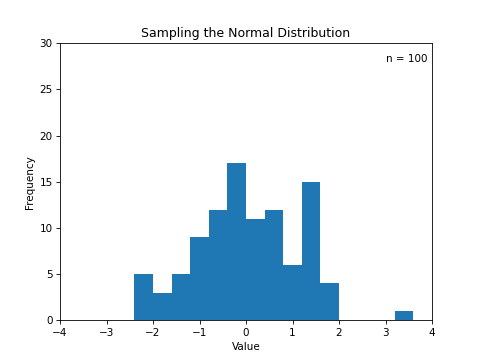

In [5]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)  # 
# (fig='figure we're working with', 'function', interval='the amount of time we want between updates.')

In [23]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

To animate the histogram, we need an animate function, which generates a random set of numbers and updates the heights of rectangles. We utilize a python closure to track an instance of BarContainer whose Rectangle patches we shall update.

In [24]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

Using hist() allows us to get an instance of BarContainer, which is a collection of Rectangle instances. Calling prepare_animation will define animate function working with supplied BarContainer, all this is used to setup FuncAnimation.

<IPython.core.display.Javascript object>


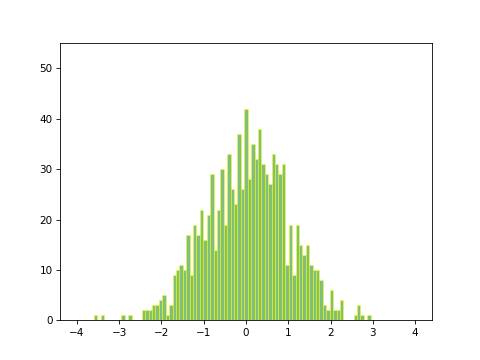

In [25]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
ani

<IPython.core.display.Javascript object>


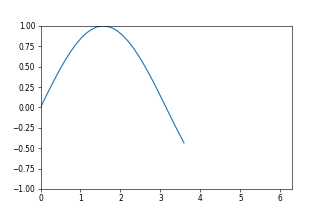

In [17]:
#%%capture
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
h = ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [12]:
ani

# Interactivity

The canvas object handles all of the drawing events and it's tightly connected with a given backend.
Interactivity based on event. Moving a mouse pointer for instance would create an event, clicking will
create an event, pressing on keys on the keyboard would create an event. This happen on software level.

Event like a piece of data which is associated with a function call. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data.

In [50]:
plt.cla?

<IPython.core.display.Javascript object>


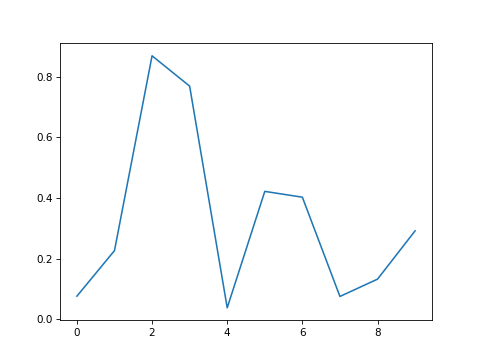

9

In [65]:
plt.figure()  # create figure
data = np.random.rand(10)  # some data for plot
plt.plot(data)  # plot the data

def onclick(event):
    plt.cla()  # clear the current axes.
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {}, {}'.format(event.x, 
                                                                         event.y,
                                                                         event.xdata, 
                                                                         event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
# To wire up: get the current figure and its canvas subject then call the 'mpl_connect' function.
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

The most important event is the pick event. The pick event allows you to respond when the user is actually clicked on a visual element in the figure. 

In [68]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada',
           'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)  # randomize the order in the list

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.478575,0.347765,Germany
1,0.050131,0.954052,Iraq
2,0.453571,0.726656,India
3,0.117106,0.104817,UK
4,0.810125,0.398154,USA
5,0.387939,0.003681,China
6,0.279488,0.740540,Brazil
7,0.123756,0.949943,Mexico
8,0.056258,0.422123,Chile
9,0.273342,0.100340,Canada


<IPython.core.display.Javascript object>


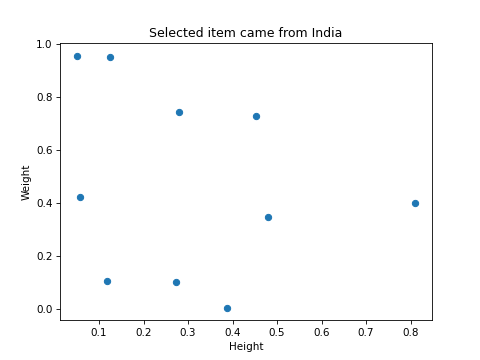

Text(0.5, 0, 'Height')

In [69]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)  # picker=5 - informs the Matplotlib backend that the
                                                   # mouse doesn't have to click directly on a rendered
                                                   # object that can be up to 5 pixels away and it should
                                                   # find closest object.
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [70]:
def onpick(event):
    """
    :param event: Pick event which has different data than the most event. It's got
                  an index value which happens to correspond to our index and the df
    """
    origin = df.iloc[event.ind[0]]['origin']  # pull out the origin information
    plt.gca().set_title('Selected item came from {}'.format(origin))

# let's wired it up.
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9

<IPython.core.display.Javascript object>


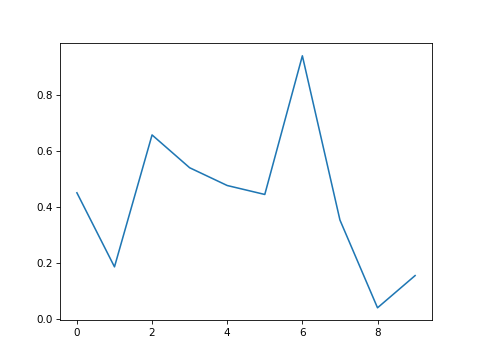

In [10]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [47]:
import statsmodels.stats.api as sms # for confidence intervals
from scipy.stats import sem # another confidence interval shorthand 
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from matplotlib.widgets import Button, Slider
# from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

class interactiveBarChart():
    """
    A base class that can be used for creating clicable charts and solving
    the challenges of interpreting plots with confidence intervals.
    """
    # basic greys: lighter for regular, darker for emphasis
    greys = ['#afafaf', '#7b7b7b'] # ticks and boxes, arrows, legend ticks and text
    # horizontal bar: nice red
    horzo_bar = '#004a80'
    # set bar colormap
    cmap = cm.get_cmap('RdBu')
    
    cpick = cm.ScalarMappable(cmap=cmap)
    cpick.set_array(np.linspace(-1, 1))

    # instantiate the class
    def __init__(self): 
        """
        Initialize the data and a new figure.
        """
        # seed for data.
        np.random.seed(12345)
        # get some data to plot
        self.df = pd.DataFrame(np.c_[np.random.normal(33500, 150000, 3650), # np.c_ class to transpose array
                                     np.random.normal(41000, 90000, 3650), 
                                     np.random.normal(41000, 120000, 3650), 
                                     np.random.normal(48000, 55000, 3650)], 
                                     columns=[1992, 1993, 1994, 1995])
        # get mean values to plot
        self.means = self.df.mean()        
        # calculate confidence interval high and low
        self.c_i = [sms.DescrStatsW(self.df[i]).tconfint_mean() for i in self.df.columns]
        # calculate the interval whole number
        self.intervals = [invl[-1] - invl[0] for invl in self.c_i] 

        # plot the bar chart and make a reference to the rectangles
        self.rects = plt.bar(
            range(len(self.df.columns)), 
            self.means,
            yerr=self.df.sem().values*1.96,
            align='center', 
            alpha=0.8, 
            color=self.greys[0],
            error_kw=dict(ecolor='gray', lw=2, capsize=7, capthick=2)
        )

        # set up a starting axhline
        self.horzo_slider = plt.axhline(y=40000, xmin=-.1, clip_on=False, zorder=1, color='#e82713')

        ## TICKS AND TEXT AND SPINES
        plt.title('Confidence Interval Interactivity: Click the Chart To Recolor', color=self.greys[1])
        plt.xticks(range(len(self.df.columns)), self.df.columns)        
        # do some formatting 
        self.formatArtists(plt.gca())


        ## EVENT HANDLING
        # reference the axes and setup pick events
        plt.gcf().canvas.mpl_connect('button_press_event', self.setAxHLine)


    def formatArtists(self, ax):
        """
        Does some recoloring and formatting of the ticks, labels, and spines.
        Receives the axes of the current figure.
        """
        # recolor the ticks
        ax.xaxis.set_tick_params(which='major', colors=self.greys[1])
        ax.yaxis.set_tick_params(which='major', colors=self.greys[1])

        # recolor the spines
        for pos in ['top', 'right', 'bottom', 'left']:
            ax.spines[pos].set_edgecolor(self.greys[0])


    ## EVENT HANDLERS
    def setAxHLine(self, event): 
        """
        Handle the logic for handling bar coloring when the slider 
        is moved up or down over the confidence intervals.
        """
        # remove first axhline
        self.horzo_slider.remove()
        self.horzo_slider = plt.axhline(y=event.ydata, xmin=-.1, clip_on=False, zorder=1, color='#e82713')
        # self.recolorBars(event)


    def recolorBars(self, event):
        """
        Handles all recoloring of the bars based on the confidence that the selected y-value 
        is within a given interval on the chart.
        This function is called on a button press event and receives that data as an argument.
        """
        # get the yval 
        y = event.ydata
        for i, rect in enumerate(self.rects):
            t, p, _ = sms.DescrStatsW(self.df[self.df.columns[i]]).ttest_mean(y)
            rect.set_color(self.cpick.to_rgba((1 - p) * t / abs(t)))
        
        # how to determine the shades ?
#         abs_diffs = [abs((mean + conf)-y|) for mean, conf in zip(self.means, self.intervals)]

         # how to pass in the map to get the colors to apply to the bars?        
#        colors = [ cm.ScalarMappable(norm=col.Normalize(vmin=i[0] , vmax=i[-1]), cmap=self.cmap) for i in self.c_i ]

        # apply the colors in a list comprehension
        # [rect.set_color(color) for rect, color in zip(self.rects, colors)]


    def showPlot(self):
        """
        Convenience if not using the inline display setup %matplotlib notebook
        """
        plt.show()

<IPython.core.display.Javascript object>


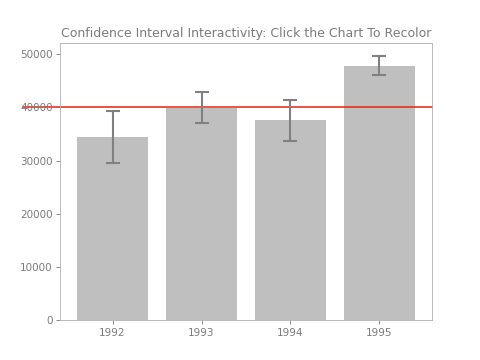

In [50]:
fig = plt.figure()

In [51]:
chart = interactiveBarChart()

In [20]:
np.random.seed?

First you should use exactly one bar plot and exactly one axhline (using more will make everything chaotic). You can set the colors of the bars via

<pre>
<code>for bar in bars:
    bar.set_color(..)</code>
    </pre>
    
and you can update the axhline's position via <code>line.set_ydata(position)</code>

Now, for every mouse move event you need to update the axhline's position, calculate the percentages and apply a new colors to the bars. So those things should be done in a function, which is called every time the mouse move event is triggered. After those settings have been applied the canvas needs to be drawn for them to become visible.


Here is a complete code.

In [76]:
mcol.Normalize?

<IPython.core.display.Javascript object>


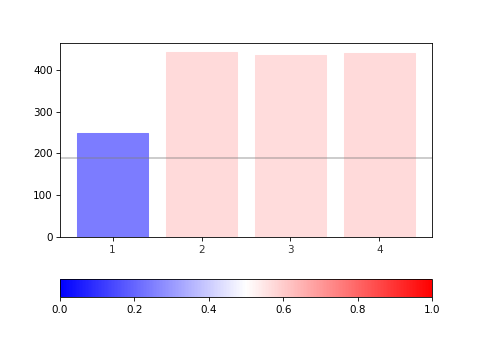

In [83]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(335,1500,300), 
                   np.random.normal(410,900,300), 
                   np.random.normal(410,1200,300), 
                   np.random.normal(480,550,300)], 
                   index=[1,2,3,4])

fig, ax = plt.subplots()

threshold=420.
bars = plt.bar(range(df.shape[0]), df.mean(axis = 1), color = 'lightslategrey')
axline = plt.axhline(y = threshold, color = 'grey', alpha = 0.5)

cm1 = mcol.LinearSegmentedColormap.from_list("Test", ["blue", "white", "red"])
cpick = cm.ScalarMappable(cmap=cm1) 
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal')

def percentages(threshold):
    percentages = []
    for bar in bars:
        percentage = (bar.get_height()-threshold)/bar.get_height()
        if percentage>1: percentage = 1
        if percentage<0: percentage=0
        percentages.append(percentage)
    return percentages

def update(threshold):
    axline.set_ydata(threshold)
    perc = percentages(threshold)
    for bar, p in zip(bars, perc):
        bar.set_color(cpick.to_rgba(p))

# update once before showing
update(threshold)

def onMouseMove(event):
    if event.inaxes == ax:
        update(event.ydata)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', onMouseMove)

plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)

plt.show()

In [75]:
list(range(df.shape[0]))

[0, 1, 2, 3]